In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [2]:
finance = pd.read_csv("Financial_data.csv")

In [3]:
print(finance.head())

   Month  Revenue  Expenses
0      1  1420000    510000
1      2  1200000    532000
2      3  1050000    551000
3      4   920000    612000
4      5   807000    628000


In [4]:
print(finance.value_counts())

Month  Revenue  Expenses
1      1420000  510000      1
2      1200000  532000      1
3      1050000  551000      1
4      920000   612000      1
5      807000   628000      1
6      720000   644000      1
Name: count, dtype: int64


In [5]:
month = finance['Month']
revenue = finance['Revenue']
expenses = finance['Expenses']

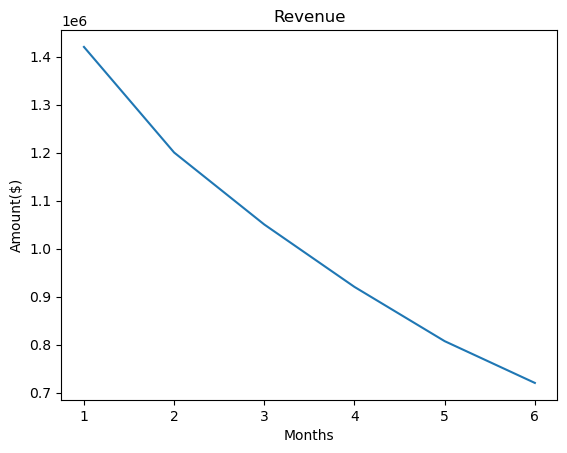

In [14]:
plt.plot(month,revenue)
plt.xlabel('Months')
plt.ylabel('Amount($)')
plt.title('Revenue')
plt.show()

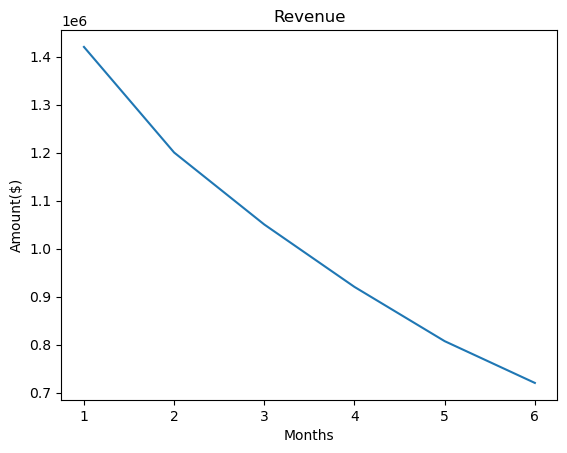

In [15]:
plt.clf()
plt.plot(month,revenue)
plt.xlabel('Months')
plt.ylabel('Amount($)')
plt.title('Revenue')
plt.show()

In [16]:
expense_overview = pd.read_csv("expenses.csv")

In [18]:
print(expense_overview.head(7))

       Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
3    Equipment        0.03
4    Utilities        0.03
5      Supples        0.01
6         Food        0.01


In [19]:
expense_categories = expense_overview['Expense']
proportions = expense_overview['Proportion']

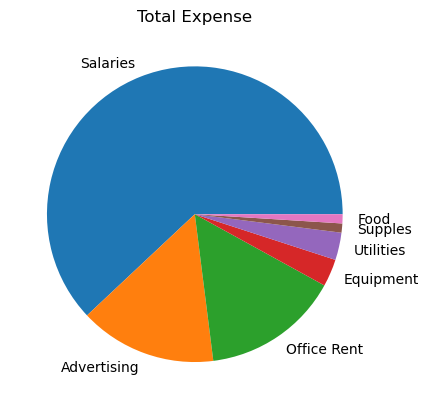

In [21]:
plt.clf()
plt.pie(proportions,labels = expense_categories)
plt.title('Total Expense')
plt.show()

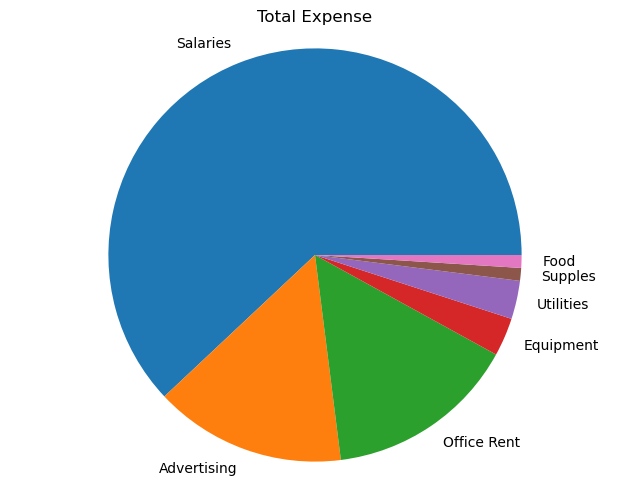

In [22]:
plt.clf()
plt.pie(proportions,labels = expense_categories)
plt.axis('Equal')
plt.tight_layout()
plt.title('Total Expense')
plt.show()

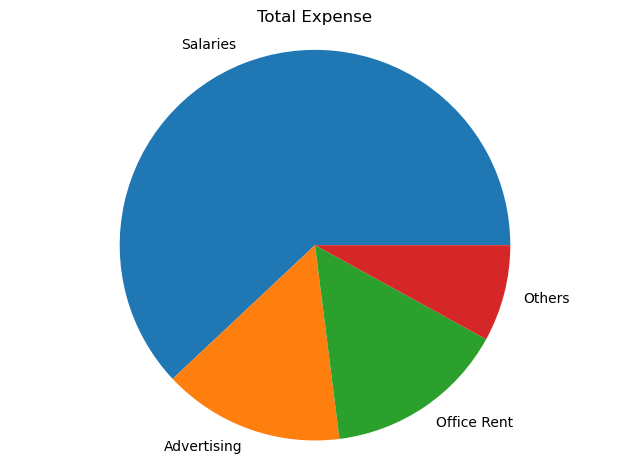

In [23]:
expense_categories = ['Salaries','Advertising','Office Rent','Others']
proportions = ['0.62','0.15','0.15','0.08']
plt.clf()
plt.pie(proportions,labels = expense_categories)
plt.title('Total Expense')
plt.axis('Equal')
plt.tight_layout()
plt.show()

In [24]:
expense_cut = 'Salaries'

In [33]:
employees = pd.read_csv("employees.csv", encoding = 'ISO-8859-1')
print(employees.head())

                Name  Salary  Productivity  Commute Time
0     Mason Pender     87902         29.91         16.79
1          Mia Rew     95672         49.91         44.48
2   Jalisa Kroenke    177864         78.00         19.40
3  Krystal Homeyer    186643         24.36         42.06
4    Kiana Wishart    167148          4.08         25.58


In [34]:
sorted_productivity = employees.sort_values(by=['Productivity'])

In [35]:
print(sorted_productivity)

                  Name  Salary  Productivity  Commute Time
259       Wilber Rye    111647          0.06         49.42
92    Fredric Gandee    154469          0.24         22.48
252  Johnson Fordham    168684          1.46         22.39
178    Lilia Lemoine    167579          1.67         27.36
162   Hilma Laughton     85506          1.79         36.41
..                 ...     ...           ...           ...
164      Miki Hartle     50856         99.54         31.39
88        Darell Nau     30530         99.63         44.25
23    Joaquina Neece     95562         99.66         48.65
202    Janae Officer    110139         99.69         15.45
6    Jacinta Dunford    130968         99.98         44.53

[300 rows x 4 columns]


In [36]:
employee_cut = sorted_productivity.head(100)
print(employee_cut)

                       Name  Salary  Productivity  Commute Time
259            Wilber Rye    111647          0.06         49.42
92         Fredric Gandee    154469          0.24         22.48
252       Johnson Fordham    168684          1.46         22.39
178         Lilia Lemoine    167579          1.67         27.36
162        Hilma Laughton     85506          1.79         36.41
..                      ...     ...           ...           ...
43   Bernardo Klingenberg     55464         34.52         32.27
186        Ashleigh Istre    178627         34.70         38.67
288       Penni Kimbrough    142680         35.21         49.64
269      Margot Mackenzie    114302         35.79         19.87
218        Quinn Frampton     44000         36.36         34.12

[100 rows x 4 columns]


In [37]:
transformation = 'Standardization'

In [41]:
commute_times = employees['Commute Time']

In [39]:
print(commute_times.describe())

count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64


### The average commute time is 33.44 minutes 
### The median commute time is 31.06 minutes

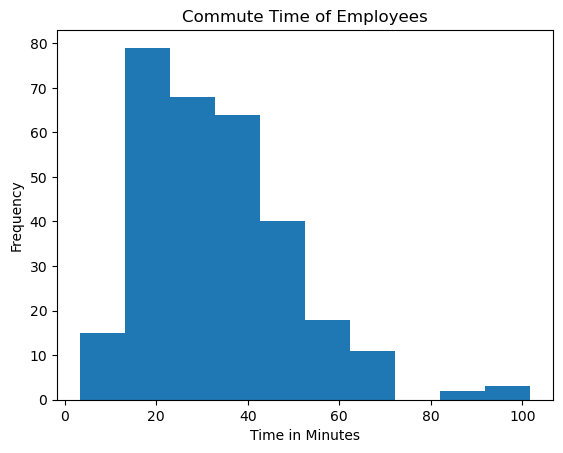

In [46]:
plt.clf()
plt.hist(commute_times)
plt.title("Commute Time of Employees")
plt.xlabel('Time in Minutes')
plt.ylabel('Frequency')
plt.show()

### The Graph is right skewed 

In [49]:
commute_time_log = np.log(commute_times)

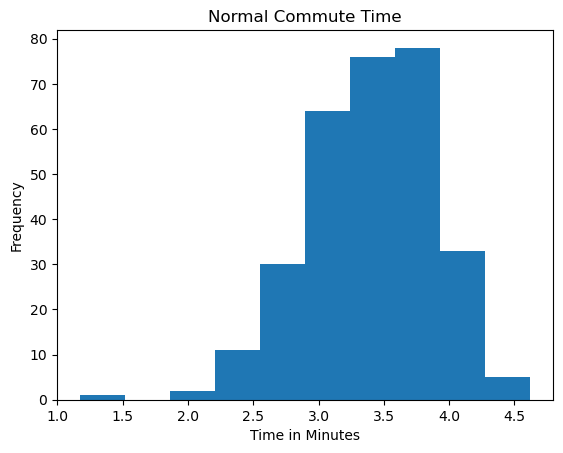

In [51]:
plt.clf()
plt.hist(commute_time_log)
plt.title('Normal Commute Time')
plt.xlabel('Time in Minutes')
plt.ylabel('Frequency')
plt.show()

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Load the CSV with an appropriate encoding
employees = pd.read_csv("employees.csv", encoding='latin1')

# Remove non-numeric columns or convert them to numeric
# Assuming 'Name' is the non-numeric column
# You can drop it if not needed
employees.drop(columns=['Name'], inplace=True)

# Alternatively, if you have categorical columns to encode, you can use OneHotEncoder
# For demonstration, let's assume 'Department' is a categorical column
# encoder = OneHotEncoder()
# encoded_columns = encoder.fit_transform(employees[['Department']])
# employees = employees.drop('Department', axis=1)
# employees = pd.concat([employees, pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out())], axis=1)

# Handle missing values if any
employees.fillna(employees.mean(), inplace=True)

# Standardize the numeric data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(employees)

print(standardized_data)


[[-4.91647524e-01 -7.42476735e-01 -1.03417293e+00]
 [-3.31570692e-01 -3.80095281e-02  6.85546286e-01]
 [ 1.36174140e+00  9.51414664e-01 -8.72075889e-01]
 [ 1.54260556e+00 -9.37966385e-01  5.35249409e-01]
 [ 1.14097135e+00 -1.65229613e+00 -4.88259898e-01]
 [-1.17159292e+00 -9.48885627e-01  6.99209638e-01]
 [ 3.95594283e-01  1.72562412e+00  6.88651593e-01]
 [-6.14064067e-01  4.68502394e-01 -9.27350360e-01]
 [-9.39368208e-01  6.16725816e-02 -2.66540952e-01]
 [-1.59393206e+00  1.52379427e+00  6.08534663e-01]
 [ 2.44644097e-01 -1.89469978e-01 -1.28570283e+00]
 [-4.44633968e-01  7.49232575e-01 -7.00662922e-01]
 [-1.59700504e-02  1.76852970e-01 -1.00870941e+00]
 [-1.42326584e+00  1.08843354e+00  7.74358076e-01]
 [ 7.04458101e-01  3.42754997e-01  5.38975778e-01]
 [-1.41069868e+00 -7.72416591e-01 -1.23167048e+00]
 [ 4.73448897e-01 -1.35007970e+00 -1.50402457e-01]
 [-1.24481211e+00  1.30643444e-02 -5.28007832e-01]
 [-8.86689127e-01 -7.25217288e-01  1.16500574e+00]
 [ 1.32634732e+00  1.16768610e+

<Axes: ylabel='Density'>

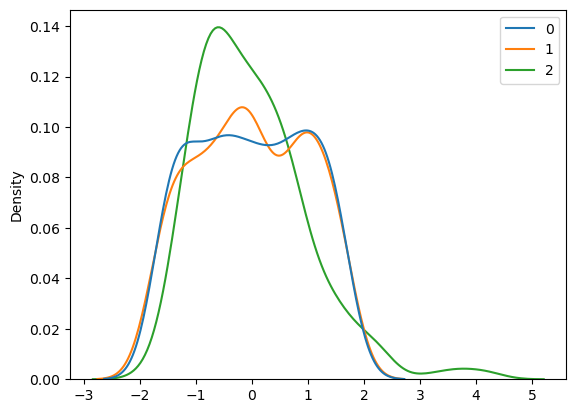

In [65]:
sns.kdeplot(standardized_data)